In [484]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [485]:
pip install imageio

Note: you may need to restart the kernel to use updated packages.


In [486]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [487]:
pip install multiprocess

Note: you may need to restart the kernel to use updated packages.


In [488]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [489]:
import pandas as pd
import numpy as np
import glob
from sklearn import cluster
from imageio  import imread
import cv2
import skimage.measure as sm
# import progressbar
import multiprocess as mp
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
new_style = {'grid': False}
plt.rc('axes', **new_style)

# Function to show 4 images
def show_four(imgs, title):
    #select_imgs = [np.random.choice(imgs) for _ in range(4)]
    select_imgs = [imgs[np.random.choice(len(imgs))] for _ in range(4)]
    _, ax = plt.subplots(1, 4, sharex='col', sharey='row', figsize=(20, 3))
    plt.suptitle(title, size=20)
    for i, img in enumerate(select_imgs):
        ax[i].imshow(img)

# Function to show 8 images
def show_eight(imgs, title):
    select_imgs = [imgs[np.random.choice(len(imgs))] for _ in range(8)]
    _, ax = plt.subplots(2, 4, sharex='col', sharey='row', figsize=(20, 6))
    plt.suptitle(title, size=20)
    for i, img in enumerate(select_imgs):
        ax[i // 4, i % 4].imshow(img)

In [490]:
select = 500 
# Data loading
train_files = sorted(glob.glob('/Users/hsilva/Documents/Code/pocketcloset/Backend/tmp/PlWxnM6UyBOU4SyXR2yCF37VNyr2/*.jpg'), key=lambda x: random.random())[:select]
train = np.array([imread(img) for img in train_files])
print('Length of train {}'.format(len(train)))

Length of train 28


/var/folders/ft/pnzkbbhj3yg25_hh4fjp4wvr0000gn/T/ipykernel_47352/4220704049.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  train = np.array([imread(img) for img in train_files])


In [491]:
print('Sizes in train:')
shapes = np.array([str(img.shape) for img in train])
pd.Series(shapes).value_counts()

Sizes in train:


(500, 489, 3)    2
(669, 679, 3)    1
(498, 569, 3)    1
(679, 679, 3)    1
(741, 466, 3)    1
(480, 840, 3)    1
(807, 679, 3)    1
(711, 679, 3)    1
(696, 679, 3)    1
(741, 679, 3)    1
(782, 679, 3)    1
(690, 679, 3)    1
(769, 679, 3)    1
(672, 679, 3)    1
(928, 679, 3)    1
(726, 550, 3)    1
(774, 679, 3)    1
(694, 679, 3)    1
(706, 679, 3)    1
(606, 561, 3)    1
(680, 679, 3)    1
(727, 679, 3)    1
(765, 679, 3)    1
(704, 679, 3)    1
(731, 679, 3)    1
(665, 679, 3)    1
(685, 679, 3)    1
dtype: int64

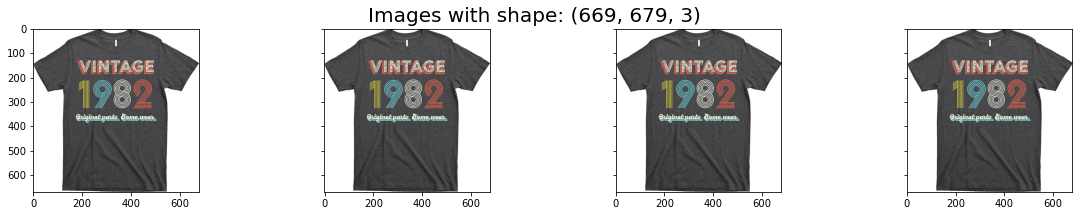

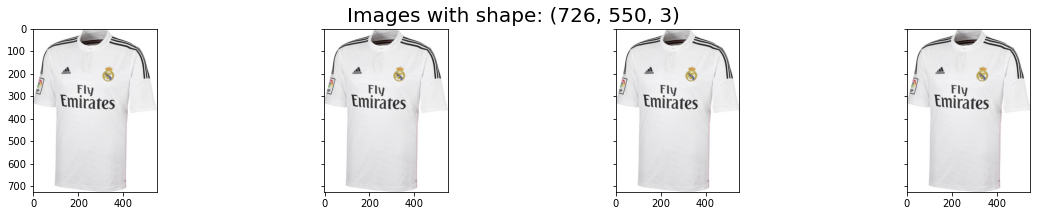

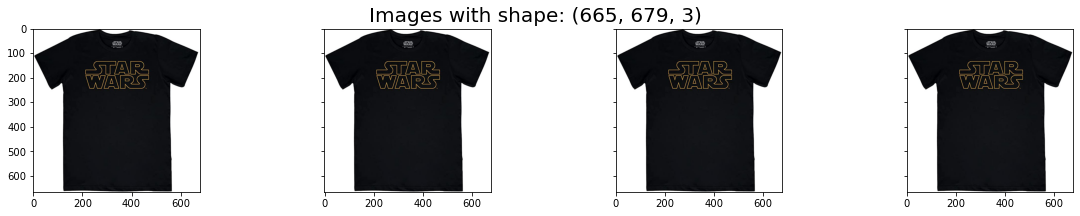

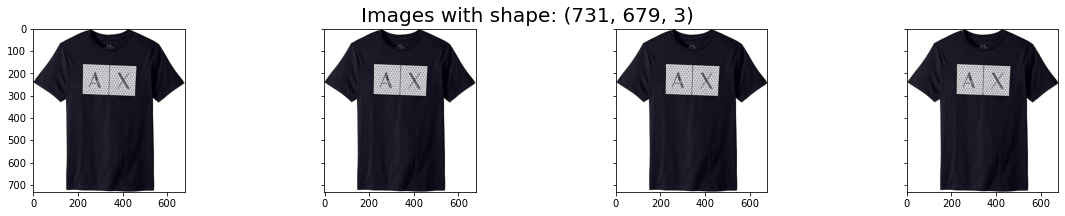

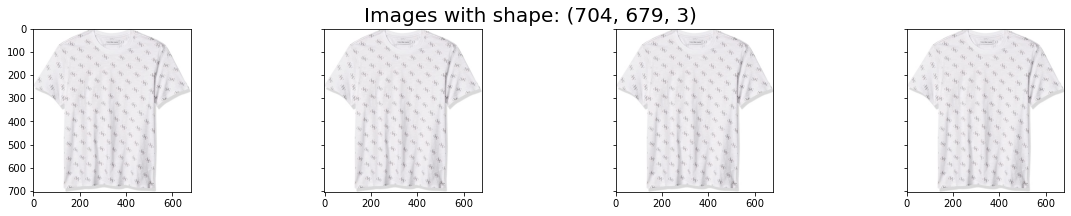

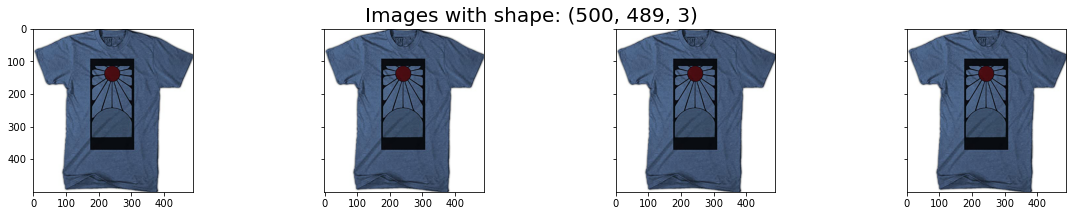

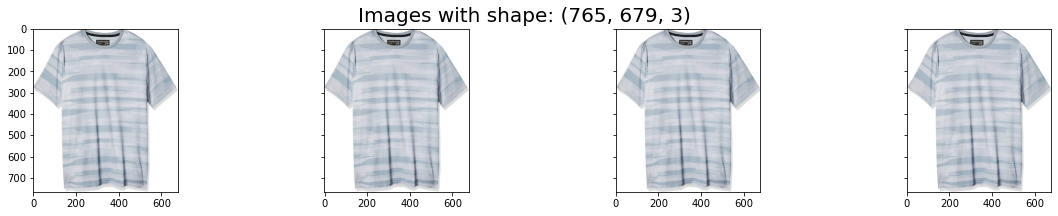

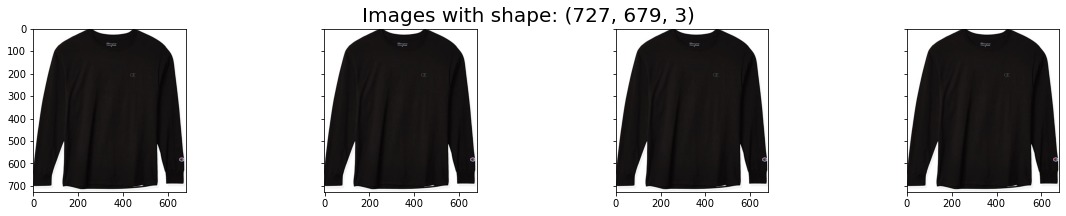

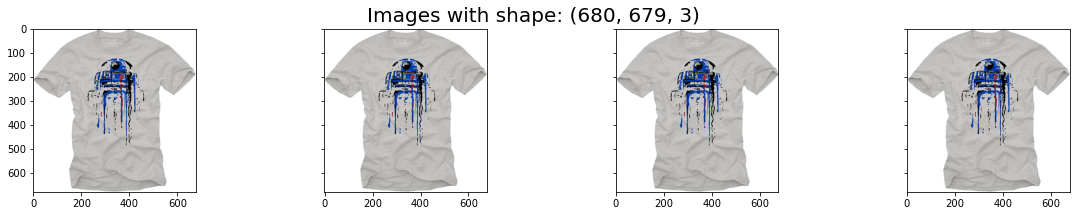

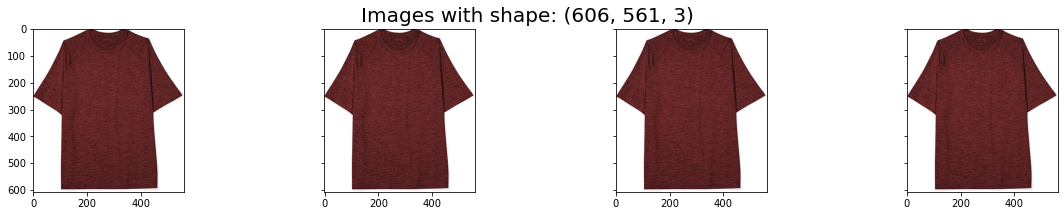

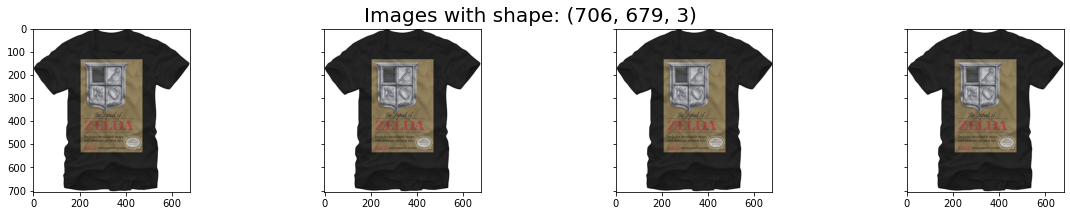

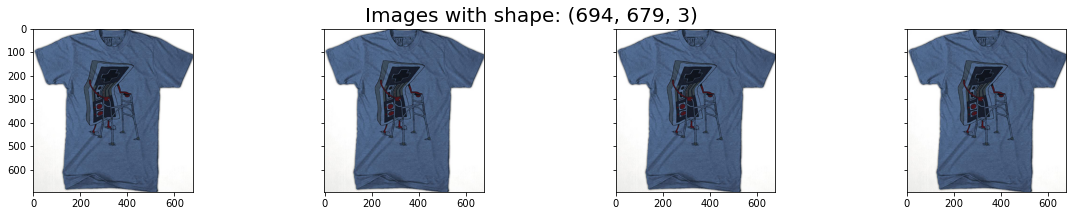

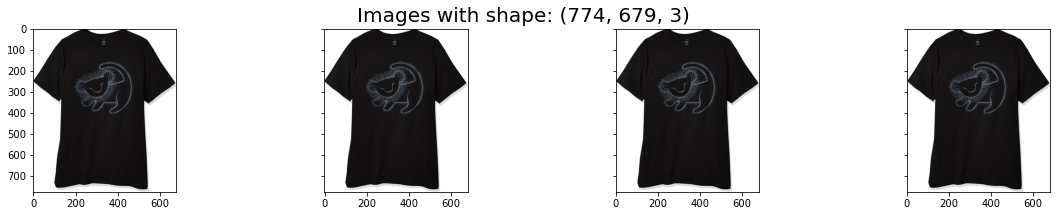

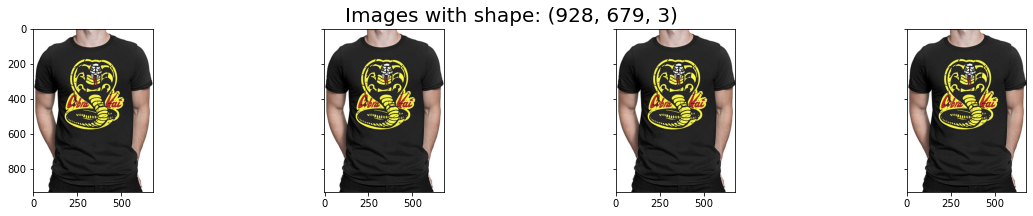

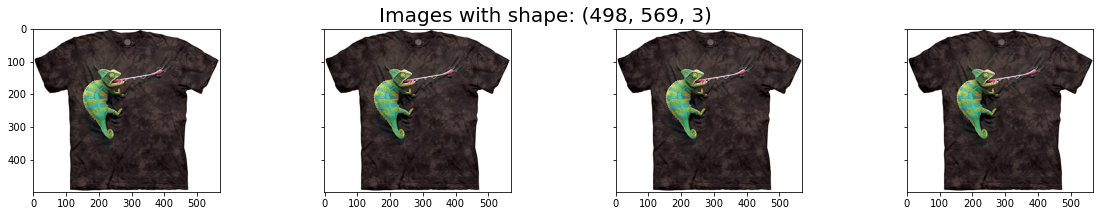

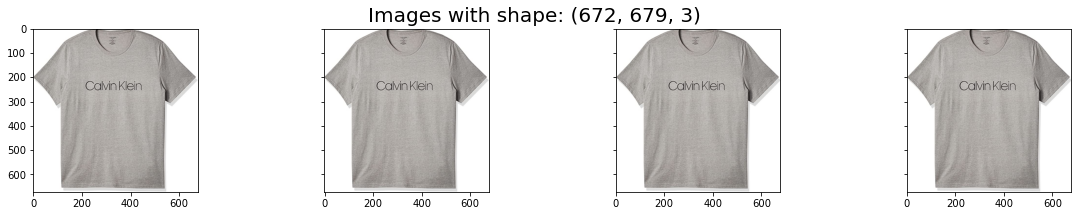

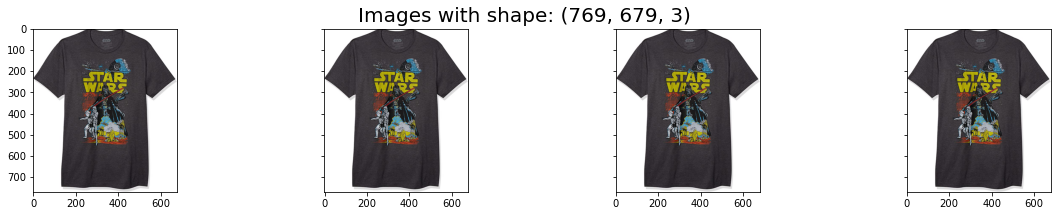

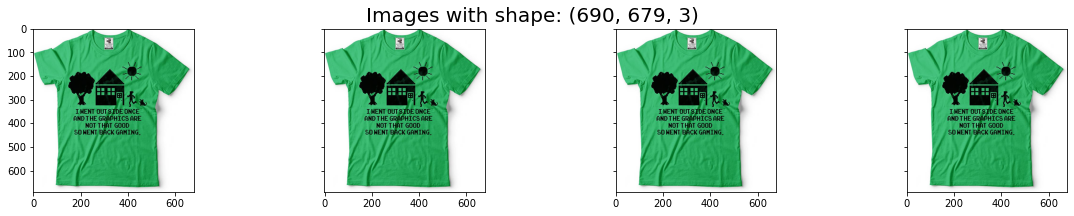

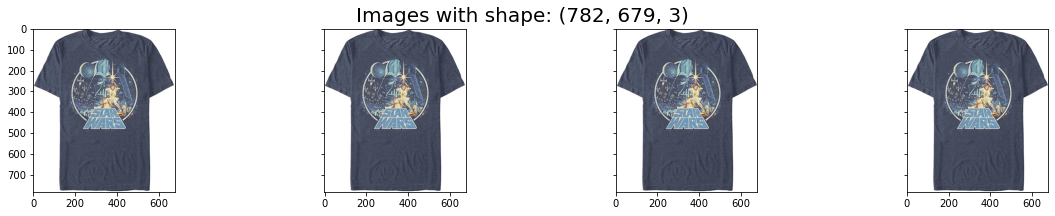

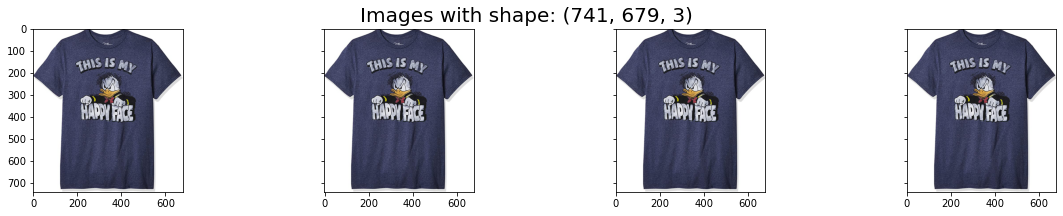

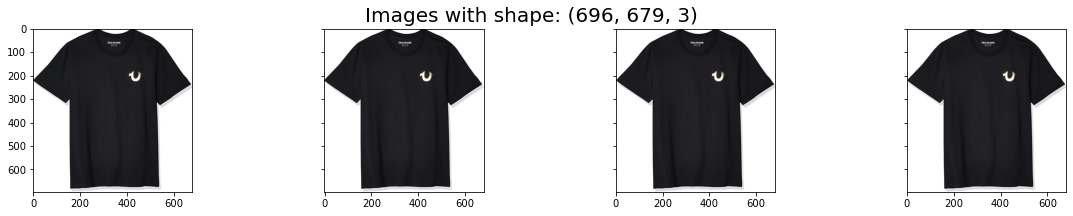

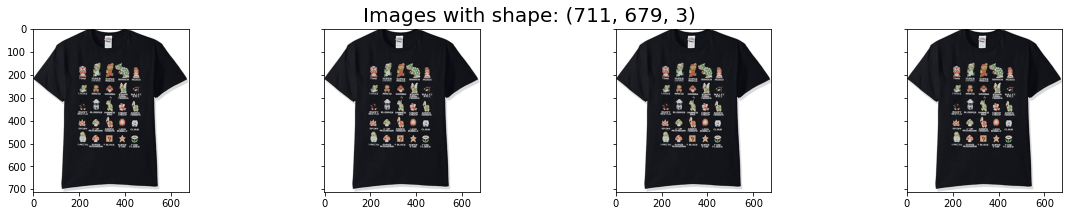

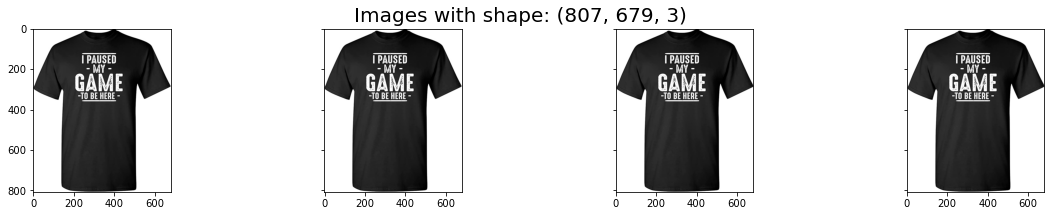

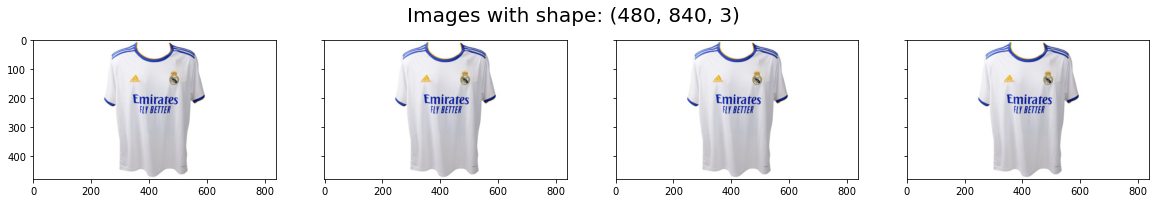

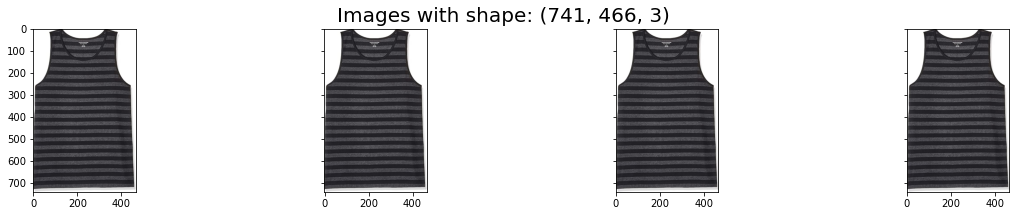

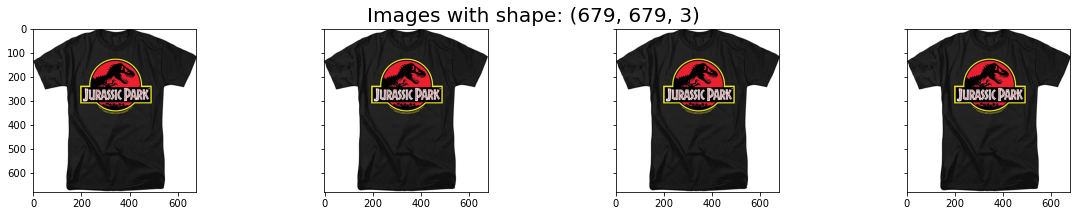

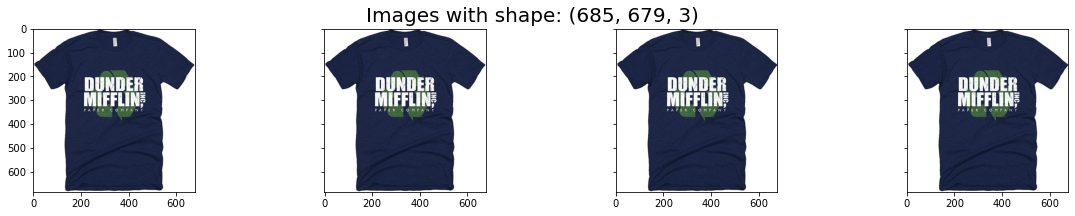

In [492]:
for uniq in pd.Series(shapes).unique():
    show_four(train[shapes == uniq], 'Images with shape: {}'.format(uniq))
    plt.show()

In [493]:
# Function for computing distance between images
def compare(args):
    img, img2 = args
    img = (img - img.mean()) / img.std()
    img2 = (img2 - img2.mean()) / img2.std()
    return np.mean(np.abs(img - img2))

# Resize the images to speed it up.
train = [cv2.resize(img, (224, 224), cv2.INTER_LINEAR) for img in train]

# Create the distance matrix in a multithreaded fashion
pool = mp.Pool(8)
#bar = progressbar.ProgressBar(max=len(train))
image_distances = np.zeros((len(train), len(train)))
for i, img in enumerate(train): #enumerate(bar(train)):
    all_imgs = [(img, f) for f in train]
    dists = pool.map(compare, all_imgs)
    image_distances[i, :] = dists


[[0.         0.91375894 0.29183993 0.37097341 0.70707346 0.32324219
  0.58754014 0.76172092 0.60984496 0.39573926 0.41117697 0.38219495
  0.40792674 0.30527149 0.54409504 0.28404566 0.38152479 0.33514913
  0.60843343 0.33324476 0.31600015 0.36356149 0.3600705  0.43999068
  1.01164606 0.91313972 0.28955569 0.34449038]
 [0.91375894 0.         0.92502301 0.91856717 0.71503654 0.90874923
  0.75774566 0.97447214 0.74219949 0.88728525 0.89109231 0.87530378
  0.8802003  0.91133141 0.96625107 0.91621887 0.84400791 0.90597194
  0.87854426 0.90381988 0.90062475 0.92700366 0.90763406 0.88841863
  0.76481197 0.99713694 0.92613267 0.92164471]
 [0.29183993 0.92502301 0.         0.42731246 0.72741017 0.24948616
  0.61517388 0.6746496  0.62431057 0.35865025 0.4282015  0.46562637
  0.36132829 0.31703213 0.49589757 0.24113864 0.41712579 0.37456063
  0.62143955 0.32208198 0.36279146 0.38943675 0.40681562 0.47786881
  1.01417265 0.84056935 0.30945987 0.3798477 ]
 [0.37097341 0.91856717 0.42731246 0.      

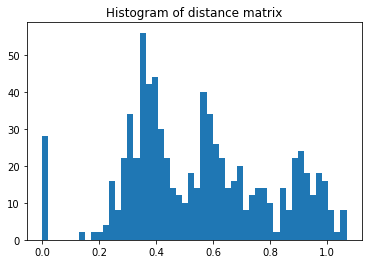

In [494]:
print(image_distances)
plt.hist(image_distances.flatten(), bins=50)
plt.title('Histogram of distance matrix')
print('')

In [495]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=5)
neighbors = nearest_neighbors.fit(image_distances)
distances, indices = neighbors.kneighbors(image_distances)

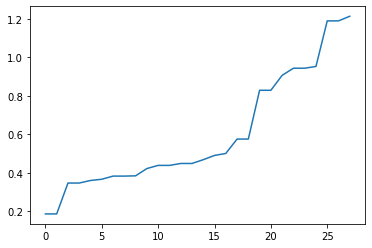

In [496]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [497]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


0.48984501715671774


<Figure size 360x360 with 0 Axes>

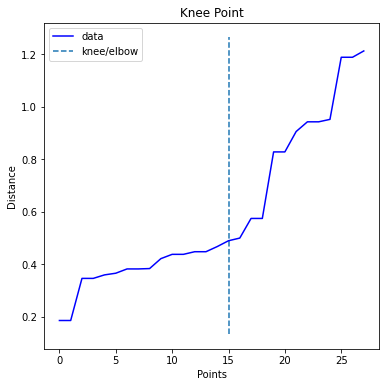

In [498]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

In [499]:
#cls = cluster.DBSCAN( min_samples=2, eps=0.6)
cls = cluster.DBSCAN( min_samples=2, eps=distances[knee.knee])
y = cls.fit_predict(image_distances)
print(y)
print('Cluster sizes:')
print(pd.Series(y).value_counts())

[ 0 -1  0  0 -1  0 -1 -1 -1  1 -1 -1  1  0 -1  0 -1  0 -1  0  0  0  0  0
 -1 -1  0  0]
Cluster sizes:
 0    14
-1    12
 1     2
dtype: int64


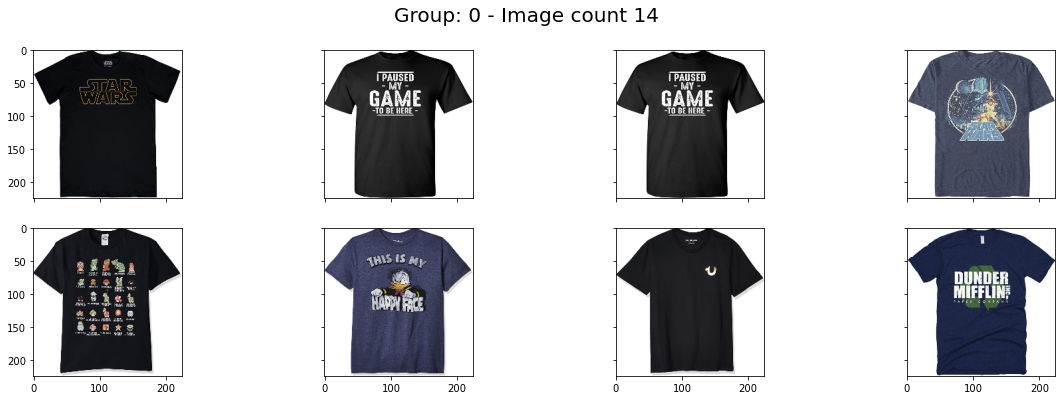

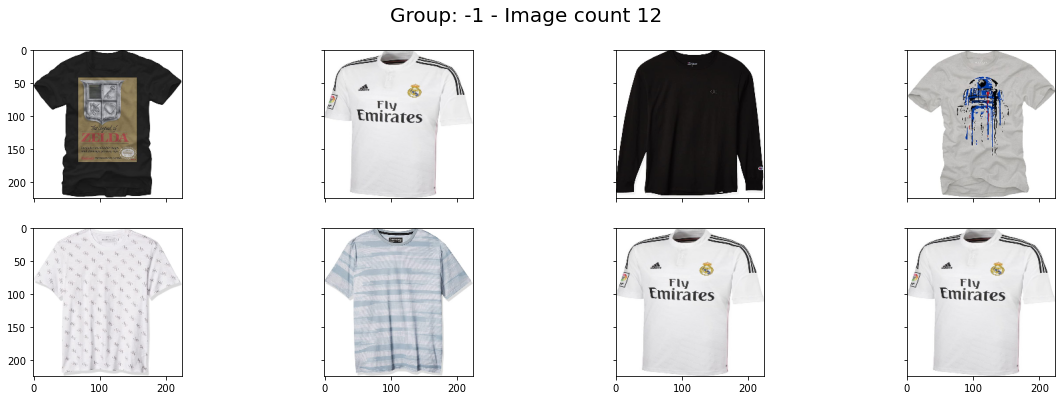

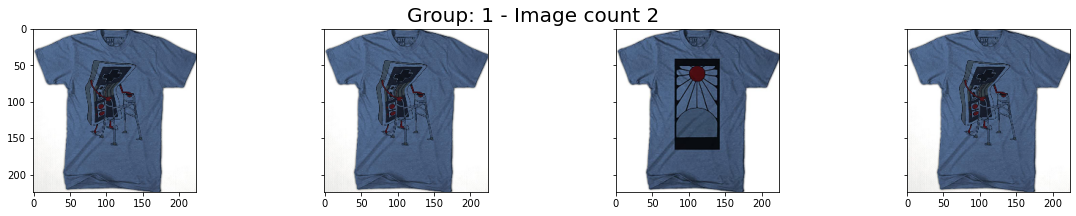

In [500]:
for uniq in pd.Series(y).value_counts().index:
        size = len(np.array(train)[y == uniq])
        if size > 10:
            show_eight(np.array(train)[y == uniq], 'Group: {} - Image count {}'.format(uniq, size))
            plt.show()
        else:
            show_four(np.array(train)[y == uniq], 'Group: {} - Image count {}'.format(uniq, size))
            plt.show()            